# Monthly Data Workflow: 1995 Test Case

**Goal:** To download, process, and analyze one year of ERA5-Land monthly averaged data, creating a robust pipeline for the full dataset.

In [1]:
# Cell 1: Download Script for 1995
import cdsapi
import os

# --- Configuration ---
output_dir = '../data/climate_monthly/'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'era5_land_monthly_1995.grib')

# --- API Request (from your notes, modified for 1995 only) ---
request_dictionary = {
    "product_type": "monthly_averaged_reanalysis",
    "variable": [
        "2m_temperature", "total_precipitation", "volumetric_soil_water_layer_1",
        "surface_net_solar_radiation", "potential_evaporation"
    ],
    "year": "1995", # Requesting only our test year
    "month": [f'{m:02d}' for m in range(1, 13)],
    "time": "00:00",
    "format": "grib",
}

# --- Execute Download ---
try:
    if not os.path.exists(output_file):
        c = cdsapi.Client()
        print("Submitting API request for 1995 monthly data...")
        c.retrieve(
            'reanalysis-era5-land-monthly-means',
            request_dictionary,
            output_file
        )
        print(f"\nDownload complete! File saved to: {output_file}")
    else:
        print(f"File already exists, skipping download: {output_file}")
except Exception as e:
    print(f"\nAn error occurred: {e}")

2025-09-10 10:13:37,343 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


Submitting API request for 1995 monthly data...


2025-09-10 10:13:37,565 INFO Request ID is 355dac1a-c529-4411-b5aa-a0c53ae21659
2025-09-10 10:13:37,647 INFO status has been updated to accepted
2025-09-10 10:13:51,259 INFO status has been updated to running
2025-09-10 10:14:27,659 INFO status has been updated to successful
                                                                                                                       


Download complete! File saved to: ../data/climate_monthly/era5_land_monthly_1995.grib


In [2]:
# CHATGPT

import os
import xarray as xr

path = r"C:\Users\lytten\programming\climarisc\data\climate_monthly\4892b2d112b82341e4dbea09a283b32e.grib"

print("File exists for Python:", os.path.exists(path))

ds = xr.open_dataset(
    path,
    engine="cfgrib",
    backend_kwargs={
        "indexpath": "",
        "filter_by_keys": {"shortName": "2t"}
    }
)

print(ds)


File exists for Python: True


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


<xarray.Dataset> Size: 311MB
Dimensions:     (time: 12, latitude: 1801, longitude: 3600)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 96B 1995-01-01 1995-02-01 ... 1995-12-01
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 14kB 90.0 89.9 89.8 ... -89.8 -89.9 -90.0
  * longitude   (longitude) float64 29kB 0.0 0.1 0.2 0.3 ... 359.7 359.8 359.9
    valid_time  (time) datetime64[ns] 96B ...
Data variables:
    t2m         (time, latitude, longitude) float32 311MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-10T11:54 GRIB to CDM+CF via cfgrib-0.9.1...


In [3]:
import pandas as pd

t = ds["t2m"]

stats = pd.DataFrame({
    "time": pd.to_datetime(ds.time.values),
    "mean_C": (t.mean(("latitude","longitude")) - 273.15).values,
    "min_C":  (t.min(("latitude","longitude"))  - 273.15).values,
    "max_C":  (t.max(("latitude","longitude"))  - 273.15).values,
})

print(stats.round(2).to_string(index=False))


      time  mean_C      min_C     max_C
1995-01-01   -8.27 -45.480000 35.290001
1995-02-01   -8.00 -46.209999 32.430000
1995-03-01   -8.86 -57.799999 33.029999
1995-04-01   -6.57 -64.830002 35.290001
1995-05-01   -4.46 -65.419998 37.730000
1995-06-01   -1.19 -66.750000 38.410000
1995-07-01    0.04 -55.439999 40.799999
1995-08-01   -1.15 -66.349998 39.680000
1995-09-01   -4.05 -70.550003 37.349998
1995-10-01   -5.15 -58.000000 35.700001
1995-11-01   -6.36 -45.209999 34.930000
1995-12-01   -7.24 -42.509998 33.709999


In [5]:
import os, cdsapi

out = r"C:\Users\lytten\programming\climarisc\data\climate_monthly\era5_land_monthly_1995_api.grib"

c = cdsapi.Client()
c.retrieve(
    "reanalysis-era5-land-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "2m_temperature",
        "year": "1995",
        "month": [f"{m:02d}" for m in range(1, 13)],
        "time": "00:00",
        "data_format": "grib",
        "download_format": "unarchived"   # <-- important
    },
    out
)

print("File exists:", os.path.exists(out), "size_MB:", round(os.path.getsize(out)/1e6, 2))


2025-09-10 12:06:08,803 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-10 12:06:09,198 INFO Request ID is e153cb88-f35c-4778-a381-1ab4ca18216d
2025-09-10 12:06:09,284 INFO status has been updated to accepted
2025-09-10 12:06:30,689 INFO status has been updated to successful
                                                                                                                       

File exists: True size_MB: 62.84


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


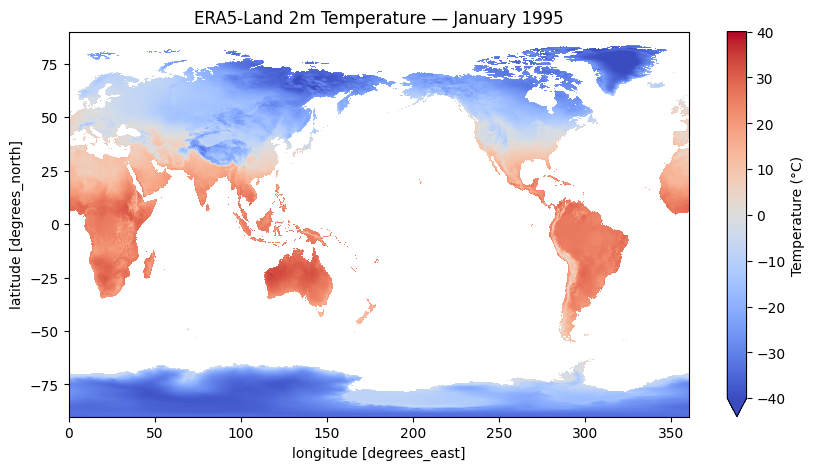

In [7]:
import xarray as xr
import matplotlib.pyplot as plt

path = r"C:\Users\lytten\programming\climarisc\data\climate_monthly\era5_land_monthly_1995_api.grib"

# Open only the 2m temperature field
ds = xr.open_dataset(
    path,
    engine="cfgrib",
    backend_kwargs={"indexpath": "", "filter_by_keys": {"shortName": "2t"}},
)

# Select January 1995
jan = ds["t2m"].sel(time="1995-01-01") - 273.15  # convert to °C

# Plot
plt.figure(figsize=(10,5))
jan.plot(
    cmap="coolwarm",
    vmin=-40, vmax=40,  # clamp to typical temperature range for better contrast
    cbar_kwargs={"label": "Temperature (°C)"}
)
plt.title("ERA5-Land 2m Temperature — January 1995")
plt.show()


In [6]:
import xarray as xr
import pandas as pd

path = r"C:\Users\lytten\programming\climarisc\data\climate_monthly\era5_land_monthly_1995_api.grib"

ds = xr.open_dataset(
    path,
    engine="cfgrib",
    backend_kwargs={"indexpath": "", "filter_by_keys": {"shortName": "2t"}},
)

t = ds["t2m"]

stats = pd.DataFrame({
    "time": pd.to_datetime(ds.time.values),
    "mean_C": (t.mean(("latitude","longitude")) - 273.15).values,
    "min_C":  (t.min(("latitude","longitude"))  - 273.15).values,
    "max_C":  (t.max(("latitude","longitude"))  - 273.15).values,
})

print(stats.round(2).to_string(index=False))


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


      time  mean_C      min_C     max_C
1995-01-01   -8.27 -45.480000 35.290001
1995-02-01   -8.00 -46.209999 32.430000
1995-03-01   -8.86 -57.799999 33.029999
1995-04-01   -6.57 -64.830002 35.290001
1995-05-01   -4.46 -65.419998 37.730000
1995-06-01   -1.19 -66.750000 38.410000
1995-07-01    0.04 -55.439999 40.799999
1995-08-01   -1.15 -66.349998 39.680000
1995-09-01   -4.05 -70.550003 37.349998
1995-10-01   -5.15 -58.000000 35.700001
1995-11-01   -6.36 -45.209999 34.930000
1995-12-01   -7.24 -42.509998 33.709999


In [ ]:
# Cell 2: Load Yield and Climate Data for 1995 (Final, Robust Method)
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# --- Load 1995 Maize Yield Data ---
ds_yield = xr.open_dataset('../data/maize/yield_1995.nc4')
print("Yield data for 1995 loaded.")

# --- Load 1995 Monthly Climate Data ---
climate_filepath = '../data/climate_monthly/era5_land_monthly_1995.grib'
# Define an explicit path for the index file that cfgrib will create.
index_filepath = climate_filepath + '.idx' 
print(f"Attempting to load climate data from: {climate_filepath}")

try:
    # We will now pass 'backend_kwargs' to give a direct instruction to the 'cfgrib' engine.
    # This tells it exactly where to create its index file, avoiding any system confusion.
    ds_climate_monthly = xr.open_dataset(
        climate_filepath, 
        engine='cfgrib',
        backend_kwargs={'indexpath': index_filepath}
    )
    
    print("SUCCESS: Monthly climate data for 1995 loaded correctly.")
    print(ds_climate_monthly)

except Exception as e:
    print(f"\nFAILED to load the GRIB file.")
    print(f"Error: {e}")

Yield data for 1995 loaded.
Attempting to load climate data from: ../data/climate_monthly/era5_land_monthly_1995.grib


In [ ]:
# Cell 3: Process Monthly Data into Yearly Growing-Season Metrics

# 1. Define Growing Season: For US Maize, we'll assume April-September (months 4-9)
growing_season_climate = ds_climate_monthly.where(ds_climate_monthly['time.month'].isin(range(4, 10)), drop=True)

# 2. Aggregate to a single metric for the year: Average growing season temperature
# We take the mean across the 'time' (monthly) dimension.
avg_growing_season_temp = growing_season_climate['t2m'].mean(dim='time') - 273.15 # Convert to Celsius

# 3. Rename coordinates to match yield data ('lat', 'lon')
avg_growing_season_temp = avg_growing_season_temp.rename({'latitude': 'lat', 'longitude': 'lon'})

# 4. Align Grids using Nearest Neighbor Interpolation
# As the supervisor suggested, we'll reindex the climate data to the yield grid.
print("Aligning climate grid to yield grid using 'nearest' method...")
temp_aligned = avg_growing_season_temp.reindex_like(ds_yield, method='nearest')

# 5. Combine into a single analysis dataset
analysis_ds = xr.Dataset({
    'yield': ds_yield['var'],
    'growing_season_temp': temp_aligned
})

print("\nData processed and aligned successfully.")
print(analysis_ds)

In [ ]:
# Cell 4: Create the Scatter Plot
import pandas as pd
import seaborn as sns

df = analysis_ds.to_dataframe().dropna()
print(f"Plotting {len(df)} data points...")

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='growing_season_temp', y='yield', 
            scatter_kws={'alpha':0.2, 's':10}, 
            line_kws={'color':'red'})

plt.title('Maize Yield vs. Avg. Growing Season Temperature (1995)')
plt.xlabel('Average Temperature April-September (°C)')
plt.ylabel('Maize Yield (tonnes per hectare)')
plt.grid(True)
plt.show()